# Методы решений нелинейных уравнений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

## Метод простых итераций

Рассмотрим метод простых итераций: будем вычислять функцию $y = \sqrt{x}$

In [2]:
def compute_solution_simple(y, x_start, num_iter: int):
    x = x_start
    w1 = 0.5
    w2 = 0.5
    for _ in range(num_iter):
        x = w1 * x  + w2 * y / x
    return x

In [3]:
y_true = 7.0
x_start = 1.0
num_iter = 100
y_pred = compute_solution_simple(y_true, x_start, num_iter)
print(f'Ground Truth: {y_true ** 0.5}')
print(f'Prediction: {y_pred}')

Ground Truth: 2.6457513110645907
Prediction: 2.6457513110645907


Можно посмотреть, как будет меняться сходимость алгоритма при различных `w1` и `w2`

## Метод Ньютона

Рассмотрим уравнение $f(x) = y$ и решим его с помощью метода Ньютона:

$$
x_{k + 1} = x_k + J^{-1}(y - f(x))
$$

In [4]:
def compute_target_function_1d(x):
    return np.exp(x)


def compute_target_function_deriv_1d(x):
    return np.exp(x)


def compute_single_step_newton_1d(y, x):
    f_value = compute_target_function_1d(x)
    f_deriv = compute_target_function_deriv_1d(x)
    return x + (y - f_value) / f_deriv


def compute_solution_newton_1d(y, x_start, num_iter):
    x_curr = x_start
    for _ in range(num_iter):
        x_curr = compute_single_step_newton_1d(y, x_curr)
    return x_curr

In [5]:
x_start = 6.0
x_true = 8.0
y = compute_target_function_1d(x_true)
num_iter = 10

x_pred = compute_solution_newton_1d(y, x_start, num_iter)
print(f'Ground Truth: {x_true}')
print(f'Prediction: {x_pred}')

Ground Truth: 8.0
Prediction: 8.0


Метод Ньютона очень чувствителен к начальному приближению. Увидим это на практике

In [6]:
x_start = 4.0
x_true = 8.0
y = compute_target_function_1d(x_true)
num_iter = 10

x_pred = compute_solution_newton_1d(y, x_start, num_iter)
print(f'Ground Truth: {x_true}')
print(f'Prediction: {x_pred}')

Ground Truth: 8.0
Prediction: 48.59815003314424


Получается, что нужно больше итераций для сходимости

Проверим, что сходимость квадратичная

In [7]:
def compute_solution_newton_trajectory_1d(y, x_start, num_iter):
    x_curr = np.zeros(num_iter + 1)
    x_curr[0] = x_start
    for i in range(1, num_iter + 1):
        x_curr[i] = compute_single_step_newton_1d(y, x_curr[i - 1])
    return x_curr

/var/folders/gf/k4351nyx5g52ftc94gr6ym4r0000gn/T/ipykernel_10527/2146852940.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = residuals[1:] / (residuals[:-1] ** 2)


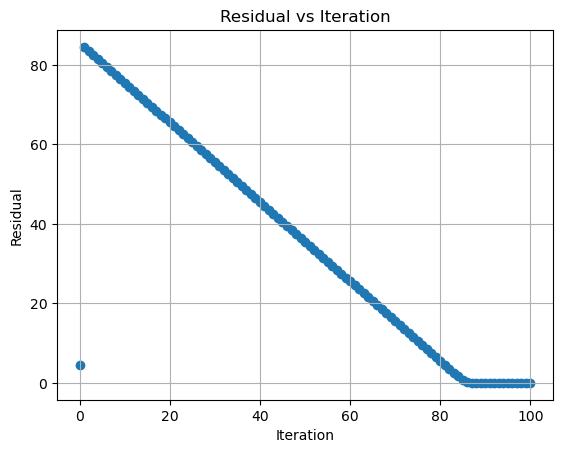

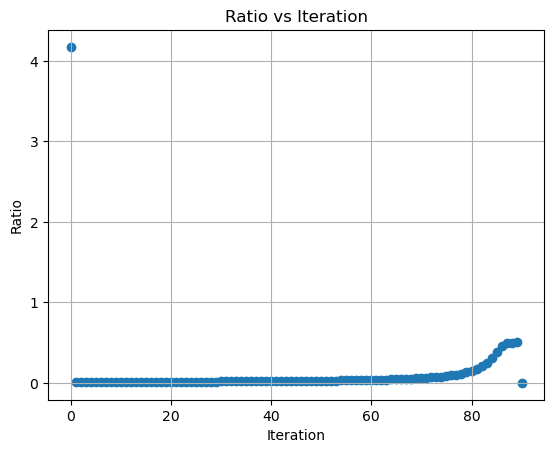

In [8]:
x_start = 3.5
x_true = 8.0
y = compute_target_function_1d(x_true)
num_iter = 100

x = compute_solution_newton_trajectory_1d(y, x_start, num_iter)
residuals = np.absolute(x - x_true)
ratio = residuals[1:] / (residuals[:-1] ** 2)


plt.scatter(range(num_iter + 1), residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Residual vs Iteration')
plt.grid()
plt.show()

plt.scatter(range(num_iter), ratio)
plt.xlabel('Iteration')
plt.ylabel('Ratio')
plt.title('Ratio vs Iteration')
plt.grid()
plt.show()

Видно, что отношение ошибок стабилизируется, что говорит о квадратичной сходимости

In [9]:
def compute_target_function_2d(x):
    y0 = np.sin(x[0] + x[1])
    y1 = np.cos(x[0] * x[1])
    return np.array([y0, y1])


def compute_target_function_deriv_2d_exact(x):
    dimx = x.size
    jmat = np.zeros((dimx, dimx))
    jmat[0, 0] = np.cos(x[0] + x[1])
    jmat[0, 1] = np.cos(x[0] + x[1])
    jmat[1, 0] = -1.0 * x[1] * np.sin(x[0] * x[1])
    jmat[1, 1] = -1.0 * x[0] * np.sin(x[0] * x[1])
    return jmat


def compute_target_function_deriv_2d_exact(x):
    dimx = x.size
    jmat = np.zeros((dimx, dimx))
    jmat[0, 0] = np.cos(x[0] + x[1])
    jmat[0, 1] = np.cos(x[0] + x[1])
    jmat[1, 0] = -1.0 * x[1] * np.sin(x[0] * x[1])
    jmat[1, 1] = -1.0 * x[0] * np.sin(x[0] * x[1])
    return jmat


def compute_single_step_newton_2d(y, x):
    f_value = compute_target_function_2d(x)
    f_deriv = compute_target_function_deriv_2d_exact(x)
    return x + np.linalg.solve(f_deriv, (y - f_value))


def compute_solution_newton_2d(y, x_start, num_iter):
    x_curr = x_start.copy()
    for _ in range(num_iter):
        x_curr = compute_single_step_newton_2d(y, x_curr)
    return x_curr

In [10]:
x_start = np.array([2.1, 1.1])
x_true = np.array([2.0, 1.0])
y = compute_target_function_2d(x_true)
num_iter = 100

x = compute_solution_newton_2d(y, x_start, num_iter)
residuals = np.absolute(x - x_true)
print(f'Residual: {residuals}')

Residual: [2.22044605e-16 2.22044605e-16]
